<a href="https://colab.research.google.com/github/kanishkagargg/Black-Friday-Sales-Prediction-Analytics-Vidhya/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Black Friday Sales Prediction

###Cleaning and Analysing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Black_fri = pd.read_csv('/content/drive/MyDrive/Black friday ML/train.csv',encoding="ISO-8859-1")

In [4]:
Black_fri

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
Black_fri.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
missing_values=Black_fri.isnull().sum()
percent_missing = Black_fri.isnull().sum()/Black_fri.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


In [7]:
len(Black_fri[Black_fri.duplicated()])

0

In [8]:
Black_fri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
Black_fri.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [10]:
for i in Black_fri.columns.tolist():
  print("No of unique values in", i, "is", Black_fri[i].nunique(), ".")

No of unique values in User_ID is 5891 .
No of unique values in Product_ID is 3631 .
No of unique values in Gender is 2 .
No of unique values in Age is 7 .
No of unique values in Occupation is 21 .
No of unique values in City_Category is 3 .
No of unique values in Stay_In_Current_City_Years is 5 .
No of unique values in Marital_Status is 2 .
No of unique values in Product_Category_1 is 20 .
No of unique values in Product_Category_2 is 17 .
No of unique values in Product_Category_3 is 15 .
No of unique values in Purchase is 18105 .


In [11]:
for i in Black_fri.columns.tolist():
  print("No of unique values in", i, "is", Black_fri[i].unique(), ".")

No of unique values in User_ID is [1000001 1000002 1000003 ... 1004113 1005391 1001529] .
No of unique values in Product_ID is ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'] .
No of unique values in Gender is ['F' 'M'] .
No of unique values in Age is ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] .
No of unique values in Occupation is [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] .
No of unique values in City_Category is ['A' 'C' 'B'] .
No of unique values in Stay_In_Current_City_Years is ['2' '4+' '3' '1' '0'] .
No of unique values in Marital_Status is [0 1] .
No of unique values in Product_Category_1 is [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] .
No of unique values in Product_Category_2 is [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] .
No of unique values in Product_Category_3 is [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] .
No of unique values in Purchas

In [12]:
Black_fri['Product_Category_2'].fillna(Black_fri['Product_Category_2'].median(), inplace=True)

In [13]:
cat_columns = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

In [14]:
Black_fri.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

###Univariate

array([[<Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Marital_Status'}>],
       [<Axes: title={'center': 'Product_Category_1'}>,
        <Axes: title={'center': 'Product_Category_2'}>,
        <Axes: title={'center': 'Product_Category_3'}>],
       [<Axes: title={'center': 'Purchase'}>, <Axes: >, <Axes: >]],
      dtype=object)

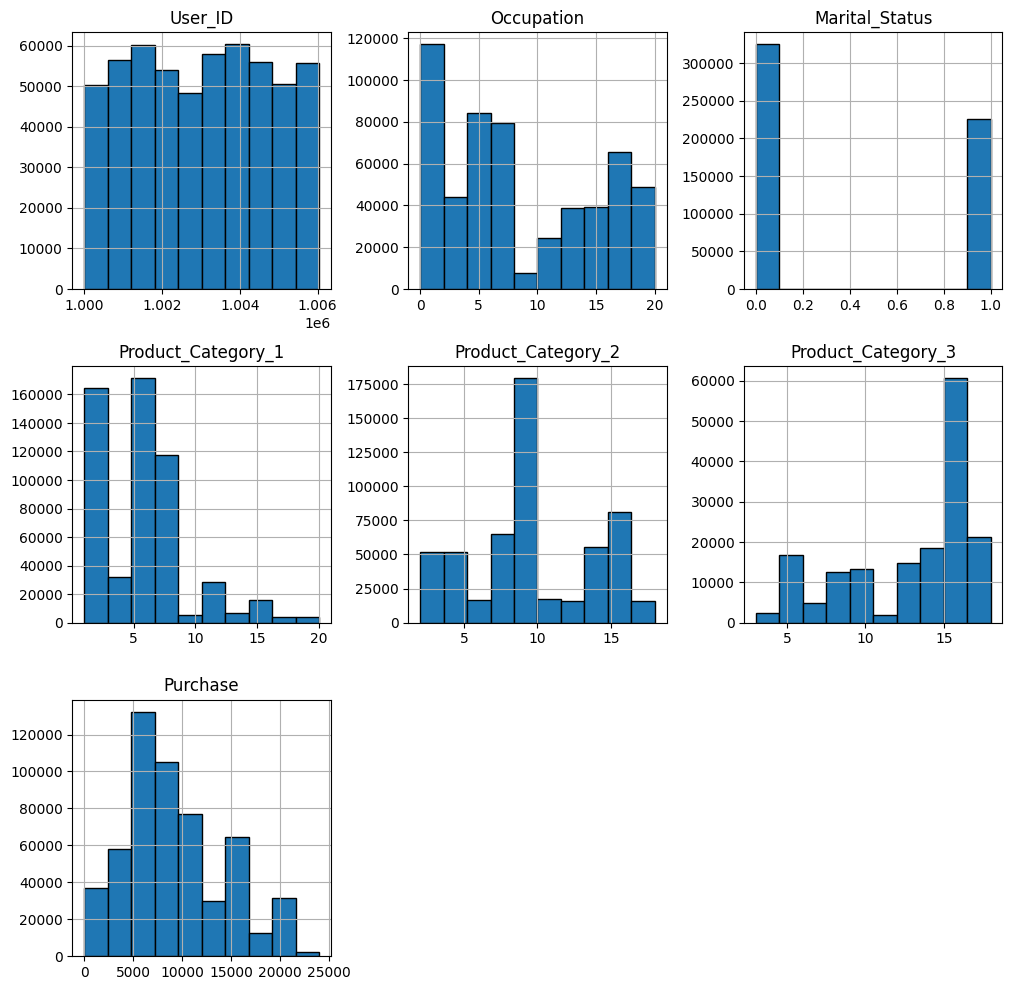

In [15]:
Black_fri.hist(edgecolor='black',figsize=(12,12))

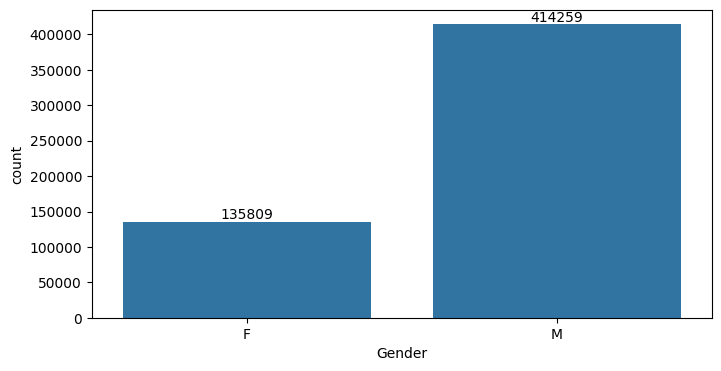

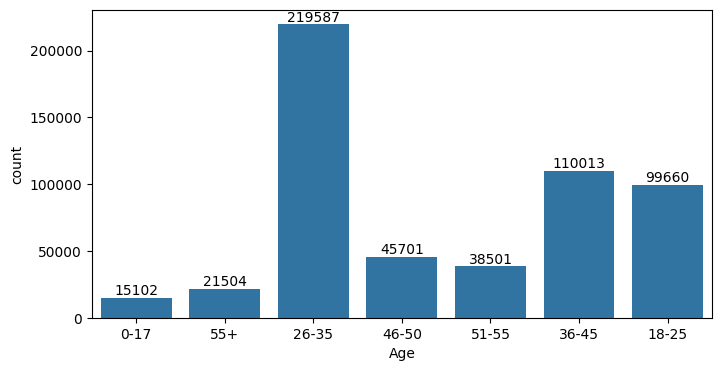

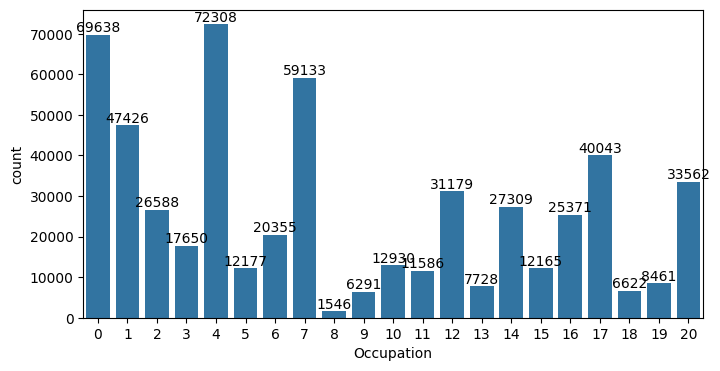

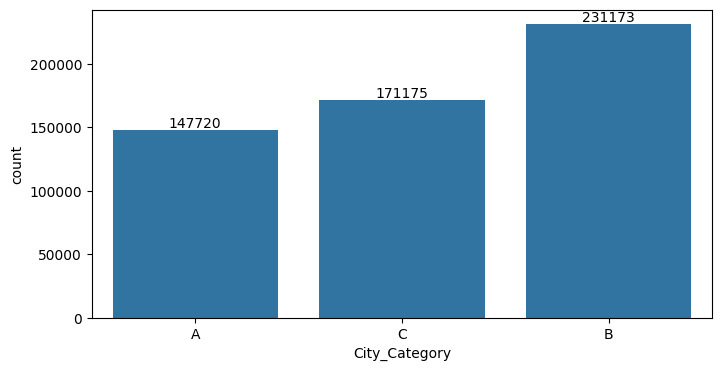

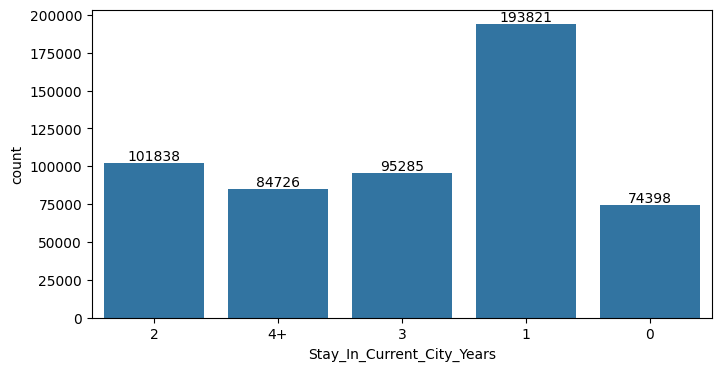

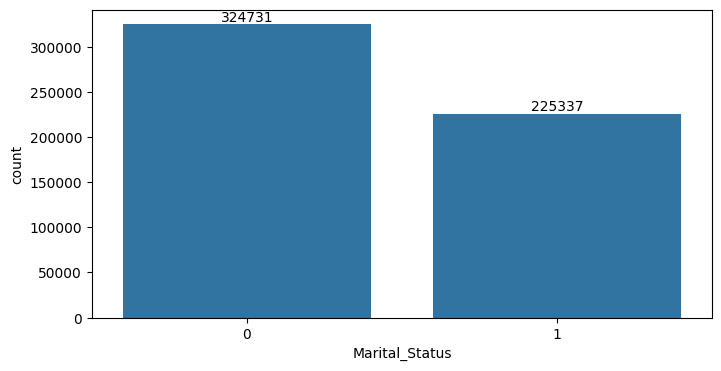

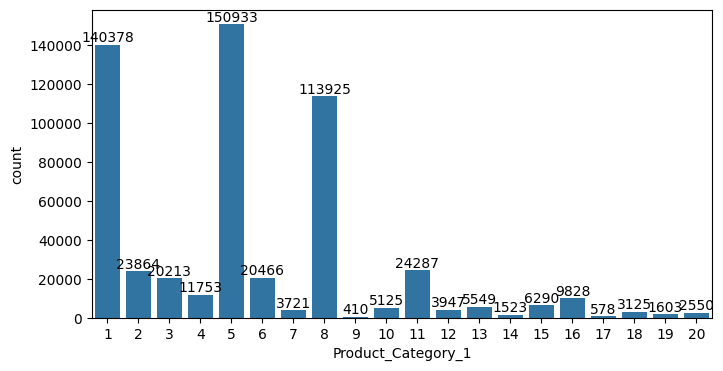

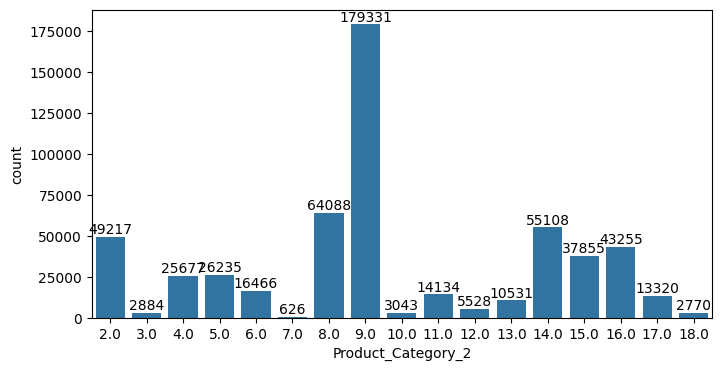

In [16]:
for category in cat_columns:
  plt.figure(figsize=(8,4))
  ax = sns.countplot(data=Black_fri, x=category)
  for bars in ax.containers:
    ax.bar_label(bars)

1) Males buys more than females.

2) Most purchases are done by the age group 26-35.

3) Most purchasesis of occupation no 4 and second highest is of no 0.

4) Most purchases are done by City B.

5) Maximum stay in current city of indivisuals is mostly 1 year and second highest is of 2 years.

6) People with marital status 0 made more purchases than 1.

7) Most popular Product category 1 are 5, 1 and 8.

8) Most popular Product category 2 is 9.

9) Most of the purchases are of the amount between 5,000 and 10,000.

##Bivariate

###Correlation

<ipython-input-17-75885e45d335>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_Heatmap = sns.heatmap(Black_fri.corr(), cmap='coolwarm', annot=True)


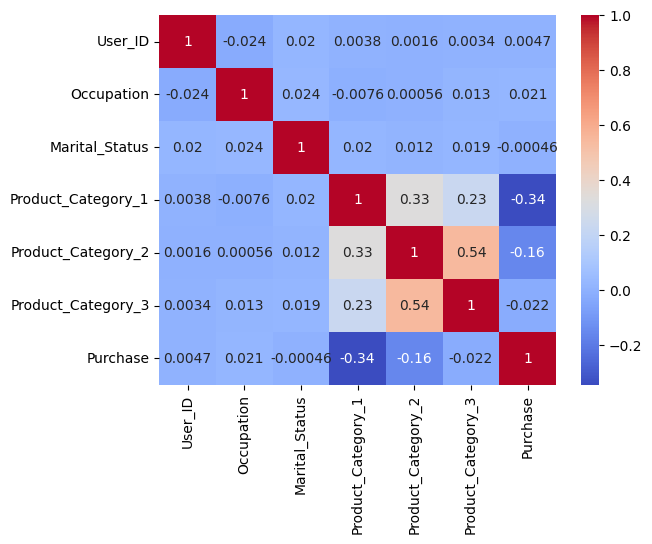

In [17]:
Correlation_Heatmap = sns.heatmap(Black_fri.corr(), cmap='coolwarm', annot=True)

###Pairplot

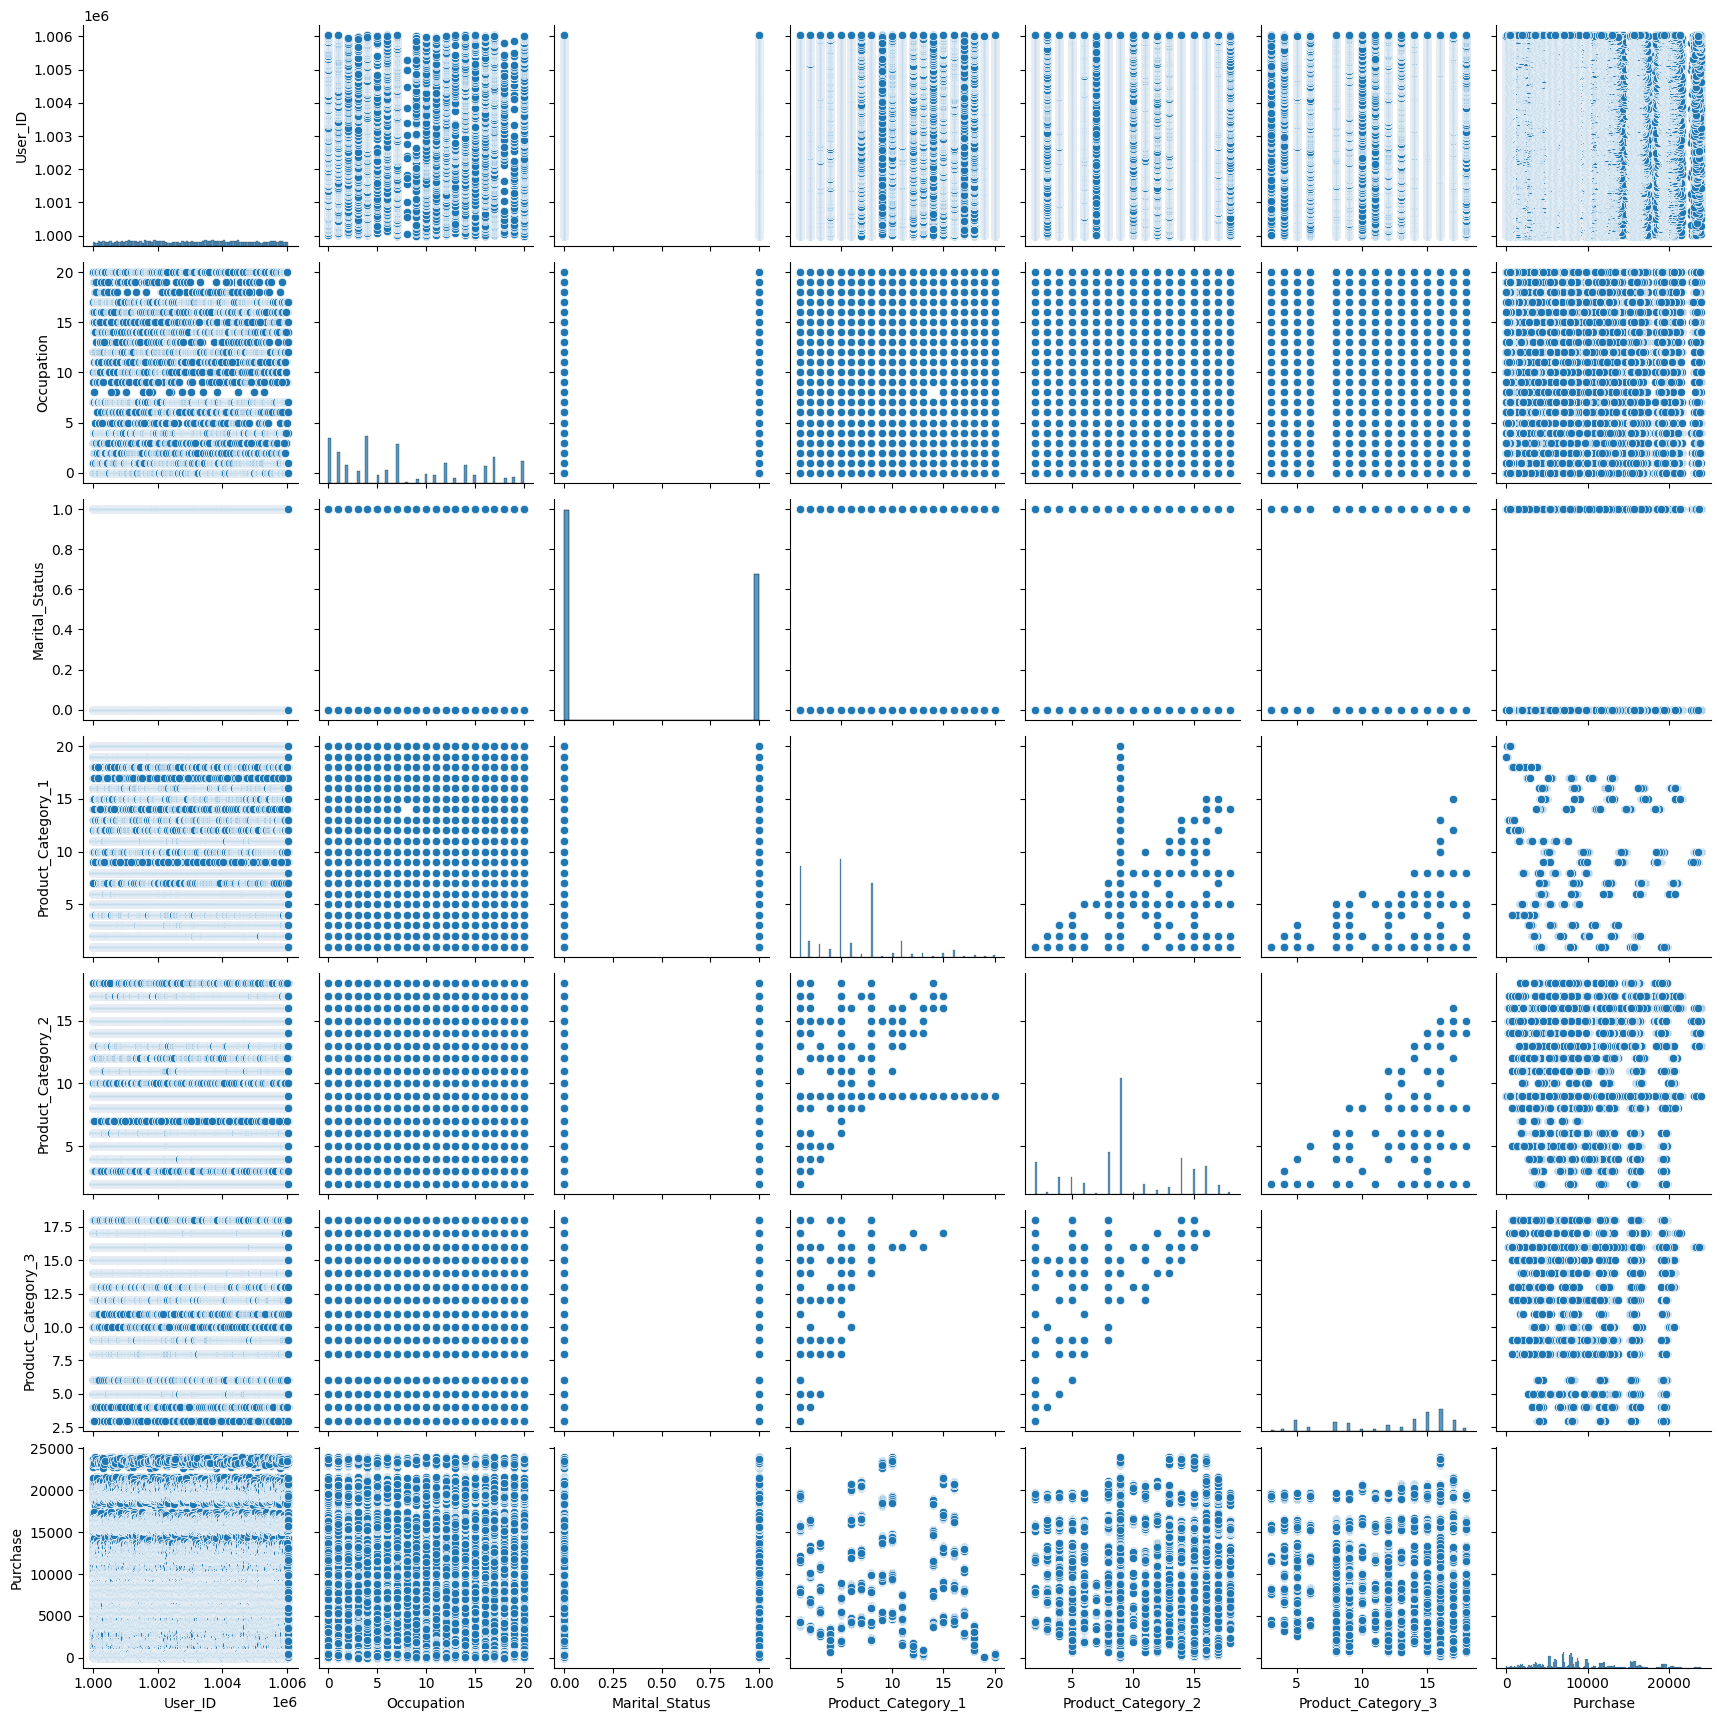

In [18]:
sns.pairplot(data = Black_fri)

###Purchase + Categorical Columns

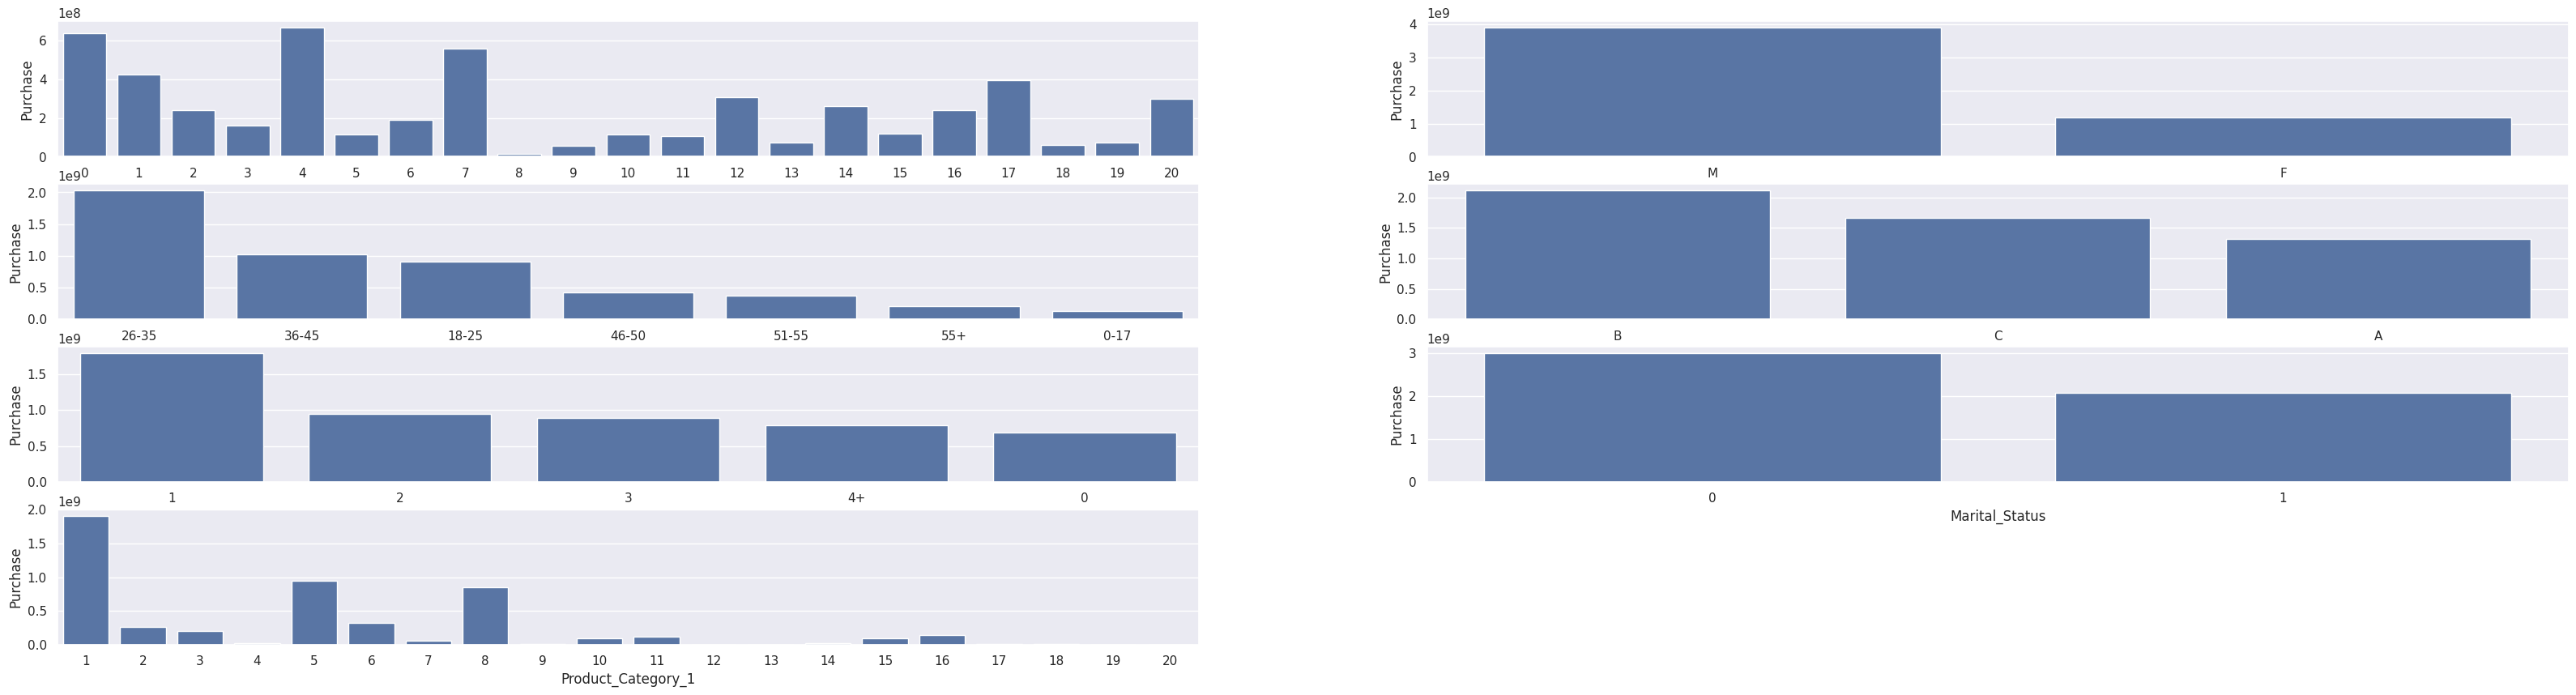

In [62]:
plt.subplot(4, 2, 1)
sns.set(rc={'figure.figsize':(40,10)})
mar_wine = Black_fri.groupby(['Occupation'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
ax = sns.barplot(x = 'Occupation', y= 'Purchase' ,data = mar_wine)

plt.subplot(4, 2, 2)
sns.set(rc={'figure.figsize':(40,10)})
mar_wine = Black_fri.groupby(['Gender'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
ax = sns.barplot(x = 'Gender', y= 'Purchase' ,data = mar_wine)

plt.subplot(4, 2, 3)
sns.set(rc={'figure.figsize':(40,10)})
mar_wine = Black_fri.groupby(['Age'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
ax = sns.barplot(x = 'Age', y= 'Purchase' ,data = mar_wine)

plt.subplot(4, 2, 4)
sns.set(rc={'figure.figsize':(40,10)})
mar_wine = Black_fri.groupby(['City_Category'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
ax = sns.barplot(x = 'City_Category', y= 'Purchase' ,data = mar_wine)

plt.subplot(4, 2, 5)
sns.set(rc={'figure.figsize':(40,10)})
mar_wine = Black_fri.groupby(['Stay_In_Current_City_Years'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
ax = sns.barplot(x = 'Stay_In_Current_City_Years', y= 'Purchase' ,data = mar_wine)

plt.subplot(4, 2, 6)
sns.set(rc={'figure.figsize':(40,10)})
mar_wine = Black_fri.groupby(['Marital_Status'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'Purchase' ,data = mar_wine)

plt.subplot(4, 2, 7)
sns.set(rc={'figure.figsize':(40,10)})
mar_wine = Black_fri.groupby(['Product_Category_1'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
ax = sns.barplot(x = 'Product_Category_1', y= 'Purchase' ,data = mar_wine)


1) Total maximum purchase amount is of Occupation no 4 and then comes no. 0 and 7.

2) Total maximum purchase amount is of Males.

3)Total maximum purchase amount is of age group 26-35.

4) Total maximum purchase amount is of City B.

5) Total maximum purchase amount is of those of stayed in current city for 1 year.

6) Total maximum purchase amount is of Martital status 0.

7) Total maximum purchase amount is for product Category 1.

###Stay_In_Current_City_Years

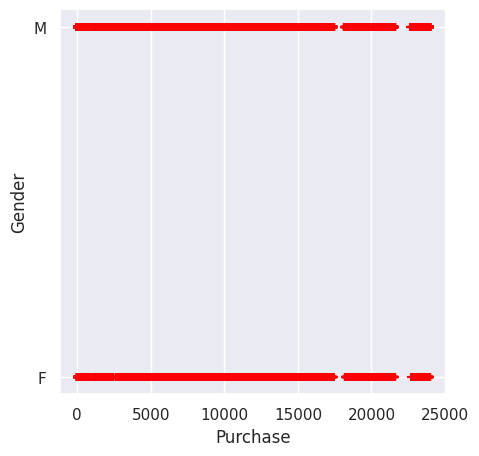

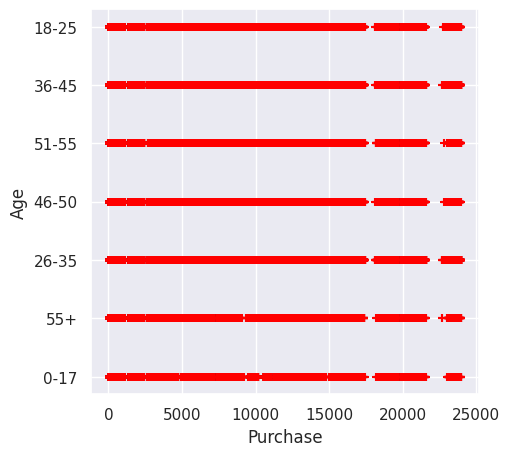

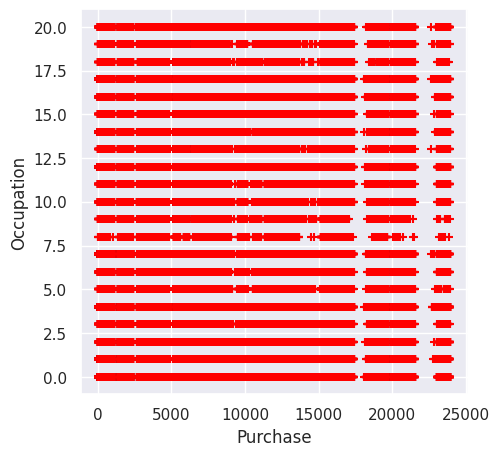

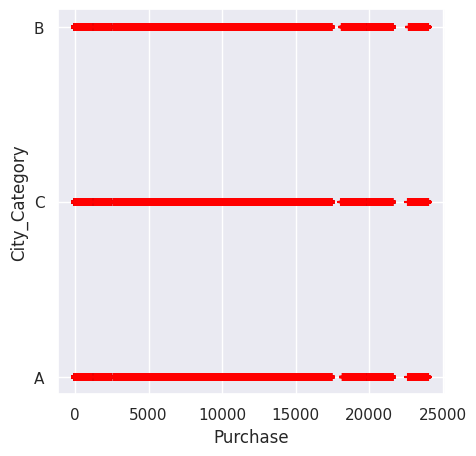

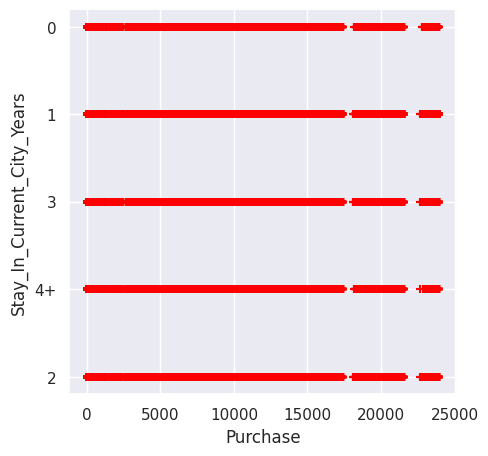

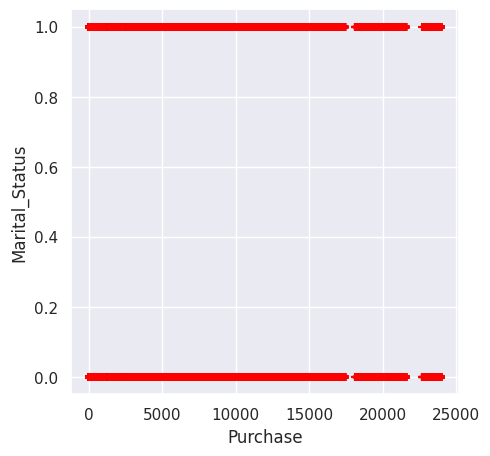

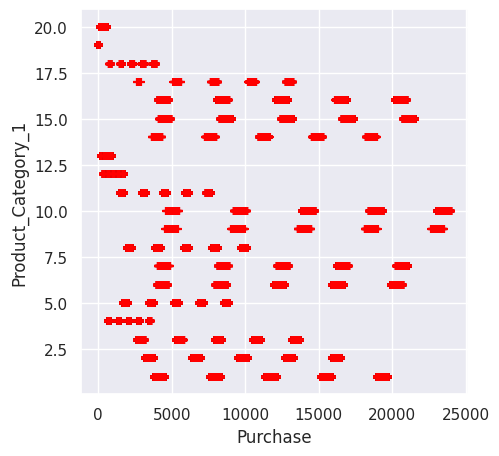

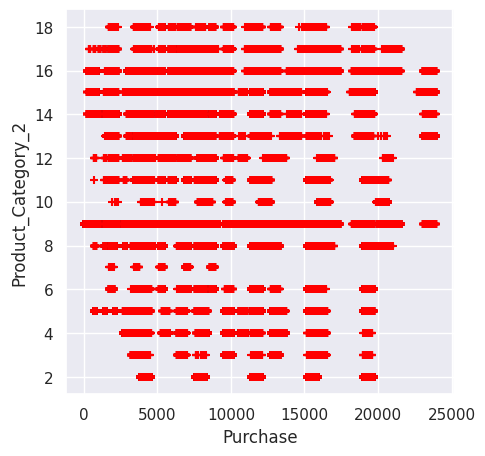

In [20]:
for i in cat_columns:
  sns.set(rc={'figure.figsize':(5,5)})
  plt.scatter(Black_fri['Purchase'], Black_fri[i], color = "red", marker = "+")
  plt.xlabel("Purchase")
  plt.ylabel(i)
  plt.show()

##With labels

In [21]:
le = LabelEncoder()

In [22]:
Black_frile = Black_fri.copy()

In [23]:
Black_frile['Gender'] = le.fit_transform(Black_frile['Gender'])

Black_frile['Age'] = le.fit_transform(Black_frile['Age'])

Black_frile['City_Category'] = le.fit_transform(Black_frile['City_Category'])

Black_frile['Stay_In_Current_City_Years'] = le.fit_transform(Black_frile['Stay_In_Current_City_Years'])

Black_frile['Product_Category_1'] = le.fit_transform(Black_frile['Product_Category_1'])

Black_frile['Product_Category_2'] = le.fit_transform(Black_frile['Product_Category_2'])

Black_frile

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,2,7,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,0,4,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,11,7,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0,11,12,NaN,1057
4,1000002,P00285442,1,6,16,2,4,0,7,7,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,19,7,NaN,368
550064,1006035,P00375436,0,2,1,2,3,0,19,7,NaN,371
550065,1006036,P00375436,0,2,15,1,4,1,19,7,NaN,137
550066,1006038,P00375436,0,6,1,2,2,0,19,7,NaN,365


In [24]:
Black_frile.drop(['Product_Category_3', 'User_ID', 'Product_ID'],axis='columns',inplace=True)
Black_frile

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,2,7,8370
1,0,0,10,0,2,0,0,4,15200
2,0,0,10,0,2,0,11,7,1422
3,0,0,10,0,2,0,11,12,1057
4,1,6,16,2,4,0,7,7,7969
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,19,7,368
550064,0,2,1,2,3,0,19,7,371
550065,0,2,15,1,4,1,19,7,137
550066,0,6,1,2,2,0,19,7,365


In [25]:
X = Black_frile.drop('Purchase', axis='columns')
y = Black_frile['Purchase']

In [26]:
SS = StandardScaler()
X = SS.fit_transform(X)
X

array([[-1.74651251, -1.84424754,  0.29486356, ..., -0.83301799,
        -0.61080871, -0.13640115],
       [-1.74651251, -1.84424754,  0.29486356, ..., -0.83301799,
        -1.11891197, -0.84628872],
       [-1.74651251, -1.84424754,  0.29486356, ..., -0.83301799,
         1.67565594, -0.13640115],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ...,  1.20045427,
         3.70806897, -0.13640115],
       [-1.74651251,  2.58827703, -1.08494277, ..., -0.83301799,
         3.70806897, -0.13640115],
       [-1.74651251,  1.11076884, -1.23825458, ...,  1.20045427,
         3.70806897, -0.13640115]])

In [27]:
Black_frile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int64
 5   Marital_Status              550068 non-null  int64
 6   Product_Category_1          550068 non-null  int64
 7   Product_Category_2          550068 non-null  int64
 8   Purchase                    550068 non-null  int64
dtypes: int64(9)
memory usage: 37.8 MB


#####Linear Regression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_test_pred = model.predict(X_test)

In [32]:
model.score(X_test,y_test)

0.12684079272286408

In [33]:
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 22030640.960849717


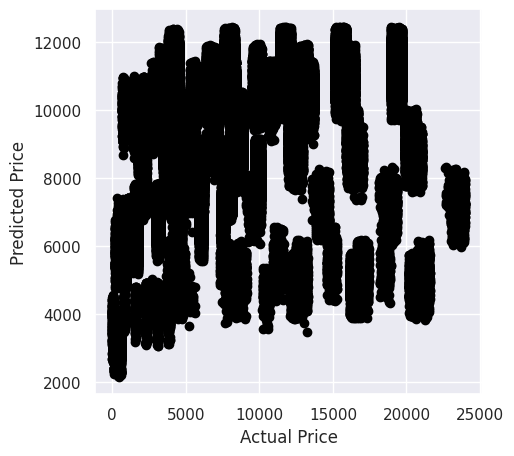

In [34]:
plt.scatter(y_test, y_test_pred, color='black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [35]:
y_train_pred = model.predict(X_train)

In [36]:
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 22079435.653204247


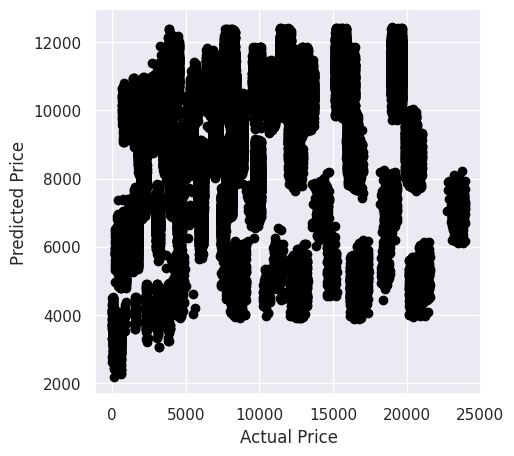

In [37]:
plt.scatter(y_train, y_train_pred, color='black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [38]:
test = pd.read_csv('/content/drive/MyDrive/Black friday ML/test.csv',encoding="ISO-8859-1")
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [39]:
test_le = test.copy()

In [40]:
test_le['Product_Category_2'].fillna(test_le['Product_Category_2'].median(), inplace=True)

In [41]:
test_le.drop(['User_ID', 'Product_ID', 'Product_Category_3'], axis='columns',inplace=True )
test_le

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,M,46-50,7,B,2,1,1,11.0
1,M,26-35,17,C,0,0,3,5.0
2,F,36-45,1,B,4+,1,5,14.0
3,F,36-45,1,B,4+,1,4,9.0
4,F,26-35,1,C,1,0,4,5.0
...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,9.0
233595,F,26-35,15,B,4+,1,5,8.0
233596,F,26-35,15,B,4+,1,1,5.0
233597,F,46-50,1,C,4+,0,10,16.0


In [42]:
test_le['Gender'] = le.fit_transform(test['Gender'])

test_le['Age'] = le.fit_transform(test['Age'])

test_le['City_Category'] = le.fit_transform(test['City_Category'])

test_le['Stay_In_Current_City_Years'] = le.fit_transform(test['Stay_In_Current_City_Years'])

test_le['Product_Category_1'] = le.fit_transform(test['Product_Category_1'])

test_le['Product_Category_2'] = le.fit_transform(test['Product_Category_2'])

test_le

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1,4,7,1,2,1,0,9
1,1,2,17,2,0,0,2,3
2,0,3,1,1,4,1,4,12
3,0,3,1,1,4,1,3,7
4,0,2,1,2,1,0,3,3
...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4,1,7,17
233595,0,2,15,1,4,1,4,6
233596,0,2,15,1,4,1,0,3
233597,0,4,1,2,4,0,9,14


In [43]:
y_pred = model.predict(test_le)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [44]:
y_pred = pd.DataFrame(y_pred)

In [45]:
final = pd.concat([test, y_pred], axis=1)

final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,8476.203080
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,6716.970602
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,773.668350
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,3565.412077
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,4531.232775


In [46]:
final.to_csv('Linear Reg.csv')

#####Extra Trees Regression

In [47]:
model = ExtraTreesRegressor(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model.score(X_test,y_test)

0.569230154458089

In [48]:
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10868734.733369665


#####Gradient Boosting Regression

In [55]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
model.score(X_test,y_test)

0.6438251538918593

In [56]:
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8986631.634296939


In [57]:
y_pred = model.predict(test_le)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [58]:
y_pred = pd.DataFrame(y_pred)

In [59]:
final = pd.concat([test, y_pred], axis=1)

final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,6562.357590
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,1460.858715
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,1786.482887
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,14125.179385
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,14144.473822


In [60]:
final.to_csv('GradientBoosting reg.csv')

##Gradient Boosting Regressor gives better result than others. Hence, final submission is based on the purchases of Gradient Boosting Regressor.